## El sistema de preprocesamiento WPS
* El propósito del módulo WPS es preparar las entradas al WRF-ARW, y cuando se realizan simulaciones con datos reales, en este módulo, se interpolan los datos terrestres a los dominios de la simulación definidos previamente. En el WPS también se interpolan los campos meteorológicos variantes en el tiempo provenientes generalmente de modelos globales (Duda, 2012). 
* El módulo WPS incluye tres componetes: **geogrid.exe**, **ungrib.exe** y **metgrid.exe**. En la siguiente figura se muestran los componentes del WPS junto con el flujo de datos. 
* Dentro del WPS existe un archivo de configuración llamado **namelist.wps**. Este contiene una lista de opciones de configuración que el código lee y permite, en tiempo de ejecución, cambiar sin tener que recompilar el código fuente nuevamente.

<div align="center">
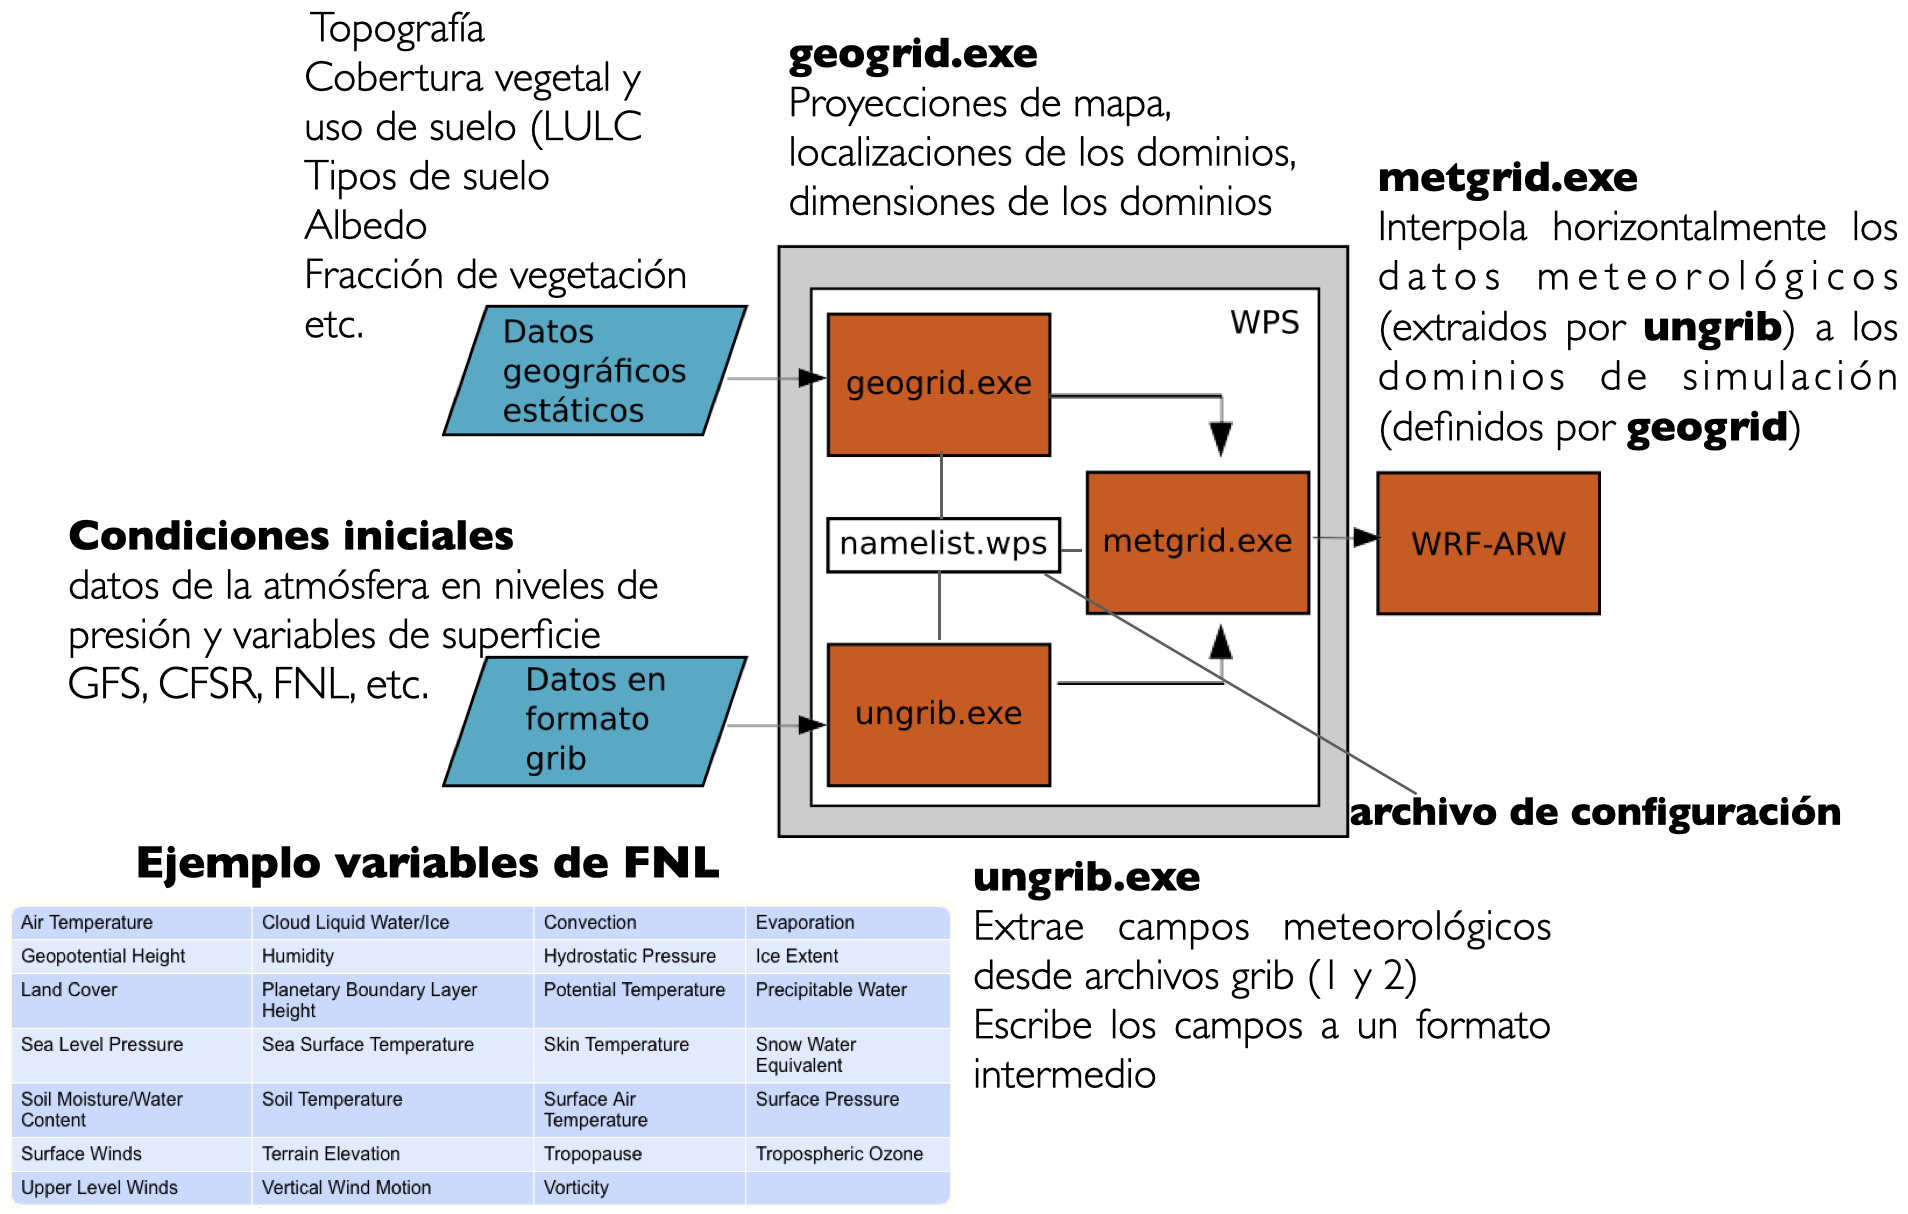
</div>

---
#### GEOGRID.EXE 
* En este programa los usuarios definen el dominio o los dominios de la simulación, la proyección y los anidamiento. 
* Su función principal es interpolar horizontalmente la información estática terreste a los dominios de simulación definidos. 
    * Entre la información terrestres se encuetra el tipo del suelo, la categoría de la cobertura vegetal y uso de suelo, la altura de la topografía, la fracción de vegetación, el albedo en superficie, entre otros (Duda, 2012). 
    * Los conjuntos de datos globales estáticos para cada uno de estos campos se proporcionan a través del sitio web del modelo WRF (http://www2.mmm.ucar.edu/wrf/users/). 
* Los dominios para realizar una simulación se definen utilizando información definida por el usuario en las secciones "share" y "geogrid" del archivo namelist.wps (WRF-ARW, 2019).

**Ejemplos de variables de GEOGRID.EXE**
<div align="center">
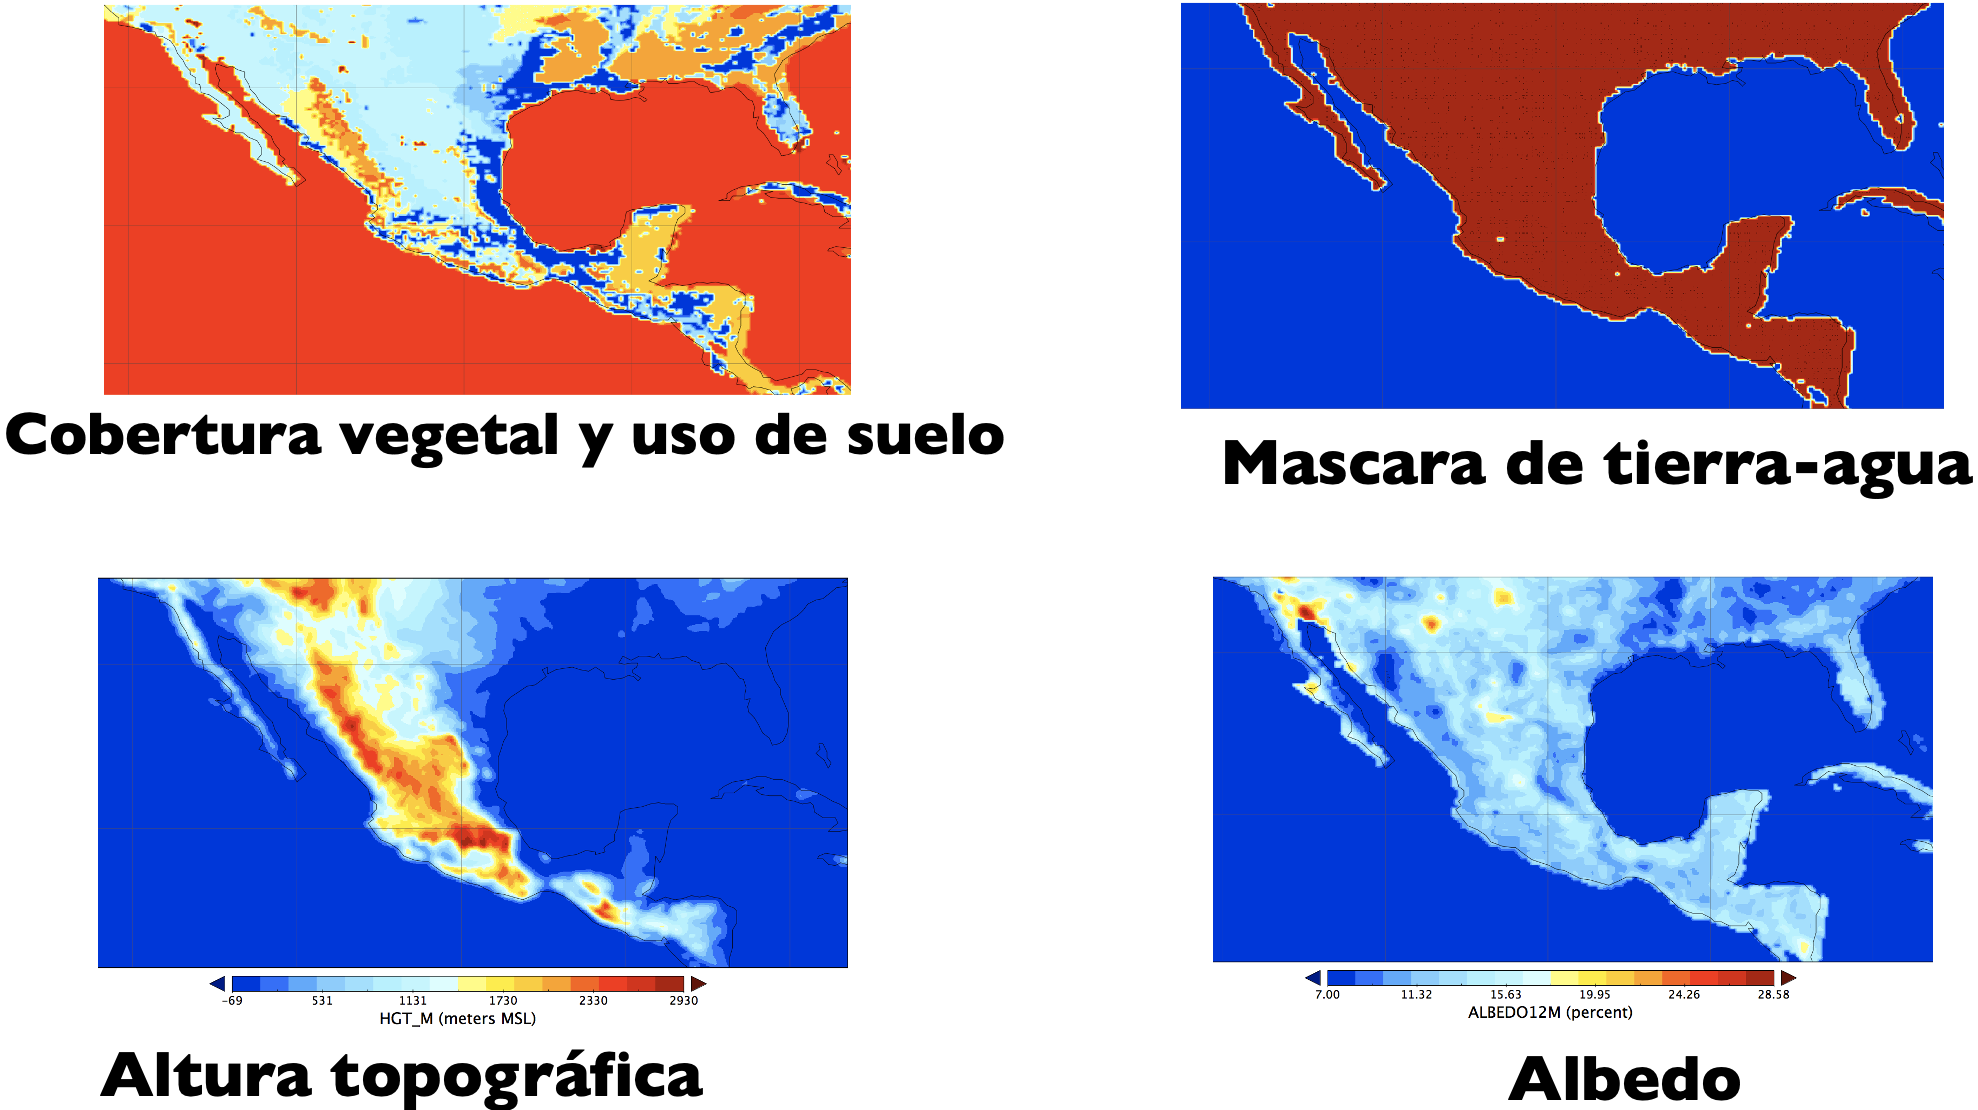
</div>

---
#### UNGRIB.EXE
* La función principal de este programa es desempaquetar los datos meteorológicos GRIB (GRIB1 y GRIB2) y empaquetarlos en un formato de archivo intermedio que el programa *metgrid.exe* puede leer. 
* *Ungrib.exe* no depende de *geogrid.exe* y no es dependiente de ningún dominio de simulación definido. 
* Este se controla mediante las secciones "share" y "ungrib" del archivo namelist.wps (WRF/ARW, 2019). 
* El formato GRIB es un formato de archivo estándar de la Organización Meteorológica Mundial (WMO, por sus siglas en inglés) para almacenar campos distribuidos regularmente en formato de malla. 
    * Los campos en un archivo se identifican sólo por números de código, los cuales deben referenciarse en una tabla externa para determinar el campo correspondiente (Duda, 2012); es decir, *ungrib.exe* hace uso de tablas de Variables (Vtables dentro del WRF) para especificar qué campos descomprimir de los archivos GRIB. 
        * Los archivos Vtables enumeran los campos y sus códigos GRIB que deben ser desempaquetados de los archivos GRIB (WRF/ARW, 2019). 
        * Típicamente los archivos GRIB tienen muchos formatos diferentes, por lo que en el modelo WRF es posible encontrar la Vtable para los tipos de datos más usados. 
        * Dentro de las Vtables que se encuentran definidas en el modelo se encuentran para datos GFS, CFSR NCEP, NARR, ERA-interim, entre otros. 
* Los archivos de salida de *ungrib.exe* son nombrados como FILE:AAAA-MM-DD_HH, donde AAAA es el año de los datos en el archivo, MM es el mes, DD es el día y HH es la hora (Duda, 2012).

**Ejemplo de una Vtable para datos GFS**
<div align="center">
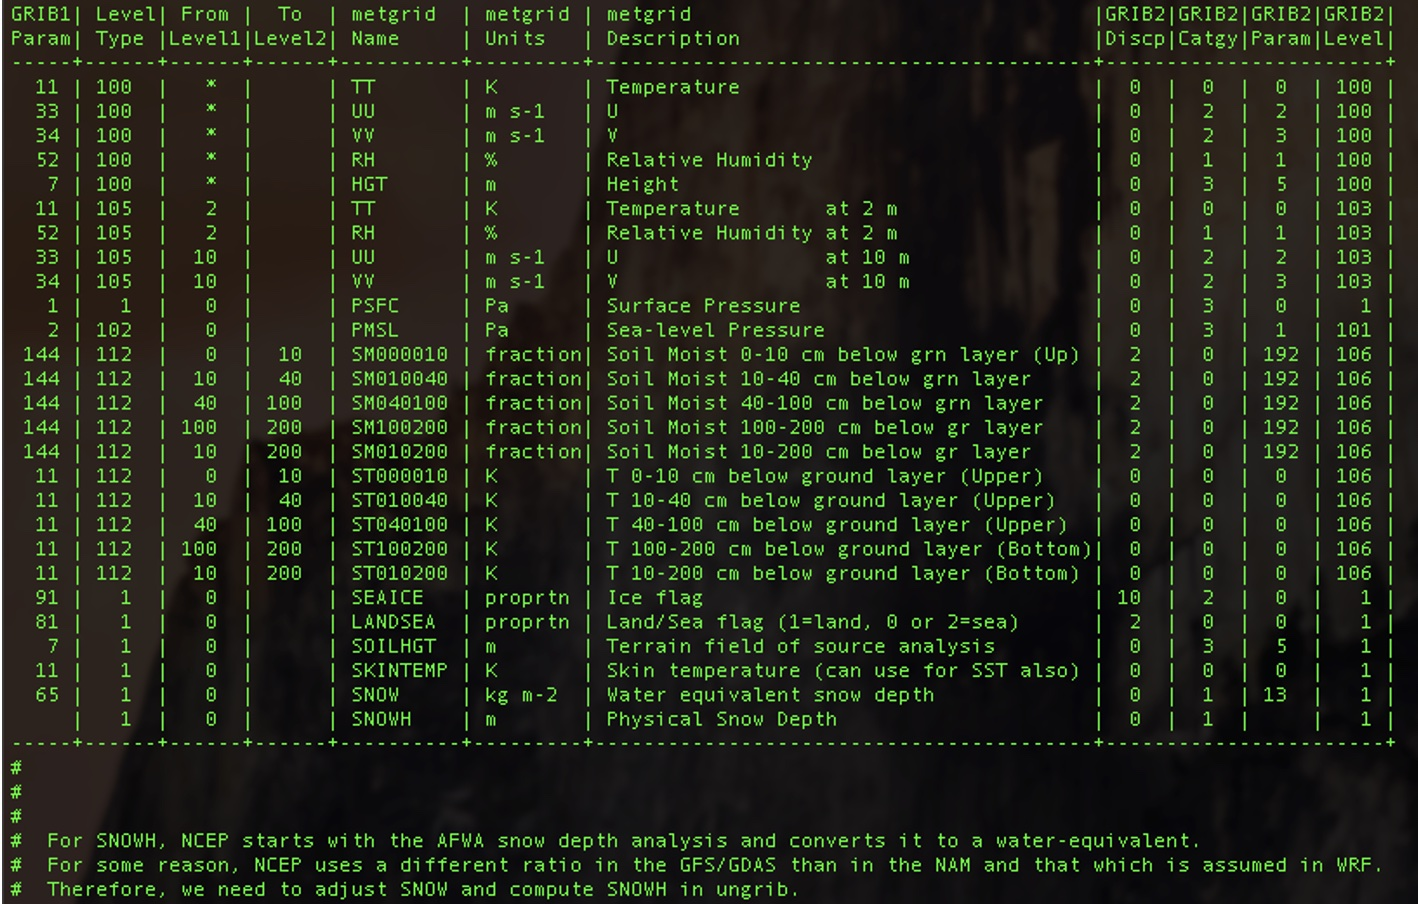
</div>

---
#### METGRID.EXE
* Este programa interpola horizontalmente los datos meteorológicos extraídos por *ungrib.exe* a los dominios de la simulación definidos por *geogrid.exe* (Duda, 2012). 
* El rango de las fechas que serán interpoladas por *metgrid.exe* se obtienen de la sección “share” del archivo namelist.wps. 
* Los archivos de salida de *metgrid.exe* se nombran met_em.d0n.AAAA-MMDD_HH:mm:ss.nc, donde n es el número que identifica el dominio de simulación, mm son los minutos y ss los segundos. AAAA, MM y DD son definidos como en la salida de *ungrib.exe*. 
* La salida de *metgrid.exe* se utiliza como entrada para el modelo WRF-ARW.
<div align="center">
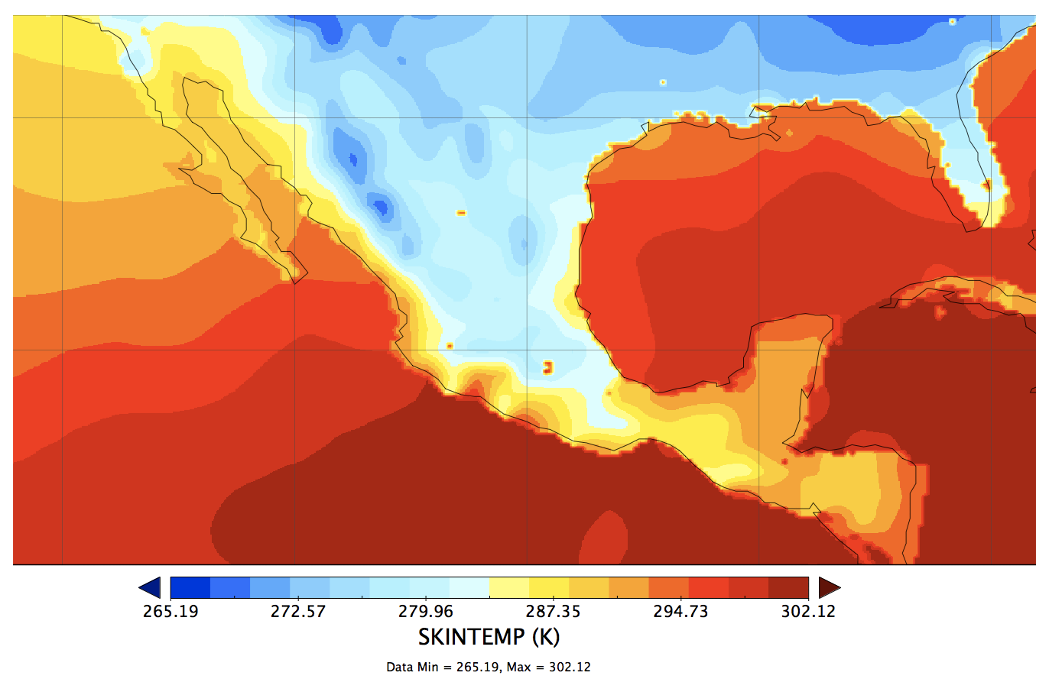
</div>